### Scikit-learn & exemple

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

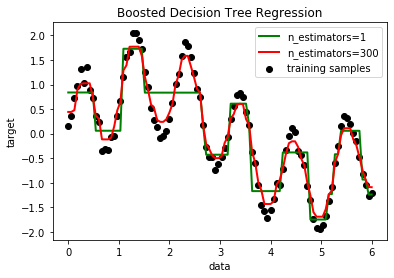

In [3]:
# Create the dataset
rng = np.random.RandomState(1)
X = np.linspace(0, 6, 100)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(6 * X).ravel() + rng.normal(0, 0.1, X.shape[0])

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)
regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=rng)

regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

### Pytorch & exemple

In [4]:
from __future__ import print_function
import torch

In [5]:
x = torch.rand(5, 3)
print(x)

tensor([[0.1973, 0.6574, 0.9023],
        [0.2211, 0.6638, 0.8715],
        [0.8756, 0.3774, 0.0733],
        [0.9055, 0.1509, 0.4888],
        [0.0560, 0.9228, 0.2411]])


### Spacepy

In [6]:
import spacepy.time as spt
import spacepy.omni as om
import spacepy.toolbox as tb

Qin-Denton/OMNI2 data not found in current format. This module has limited functionality.
Run spacepy.toolbox.update(QDomni=True) to download data


In [7]:
#tb.update(QDomni=True)

In [8]:
ticks = spt.Ticktock(['2002-02-02T12:00:00', '2002-02-02T18:00:00'], 'ISO')
ticks = spt.tickrange('2002-01-01T00:00:00', '2002-02-01T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)
d.tree(levels=1)

+
|____ByIMF
|____Bz1
|____Bz2
|____Bz3
|____Bz4
|____Bz5
|____Bz6
|____BzIMF
|____DOY
|____Dst
|____G
|____Hr
|____Kp
|____Pdyn
|____Qbits
|____RDT
|____UTC
|____W
|____Year
|____akp3
|____dens
|____ticks


==================================================================================

# Projet

In [9]:
from __future__ import print_function
import torch

import numpy as np
import scipy as scp
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy.linalg as npl 
    
from math import *

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

from sklearn.neighbors import NearestNeighbors
from sklearn import neighbors

## Nearest Neighbors

### On va faire quelques exemples avec les données qu'on a pris dans la partie "spacepy" ci-dessus

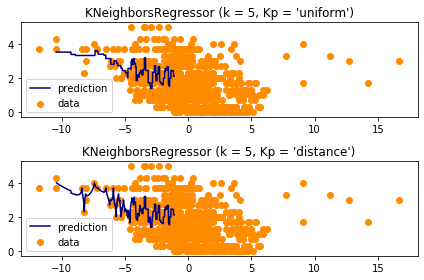

In [10]:
#X = np.sort(d['BzIMF'],axis = 0)
X = d['BzIMF']
X = X.reshape(-1,1)
T = np.linspace(X[0], X[-1], 10000)
y = d['Kp']

#y[::5] += 1*(0.5 - np.random.rand(3356))

n_neighbors = 5

for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, Kp = '%s')" % (n_neighbors,weights))

plt.tight_layout()
plt.show()

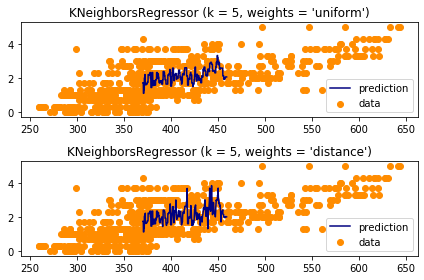

In [11]:
#X = np.sort(d['velo'],axis = 0)
X = d['velo']
X = X.reshape(-1,1)
T = np.linspace(X[0], X[-1], 10000)
y = d['Kp']

#y[::5] += 1*(0.5 - np.random.rand(3356))

n_neighbors = 5

for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.tight_layout()
plt.show()

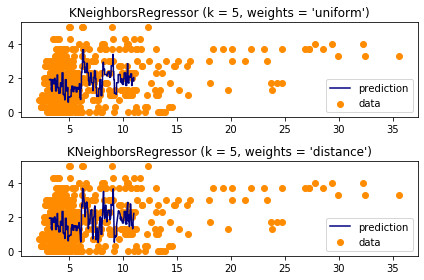

In [12]:
#X = np.sort(d['dens'],axis = 0)
X = d['dens']
X = X.reshape(-1,1)
T = np.linspace(X[0], X[-1], 10000)
y = d['Kp']

#y[::5] += 1*(0.5 - np.random.rand(3356))

n_neighbors = 5

for i, weights in enumerate(['uniform','distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color='darkorange', label='data')
    plt.plot(T, y_, color='navy', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,weights))

plt.tight_layout()
plt.show()

### On commence...

In [14]:
ticks = spt.tickrange('2003-01-01T00:00:00', '2003-04-28T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)

In [15]:
Bz=d['BzIMF']
n=d['dens']
Kp=d['Kp']
K=np.zeros((np.size(d['velo']),3))
for i in range (np.size(d['velo'])):
    K[i,0]=d['velo'][i]
    K[i,1]=d['BzIMF'][i]
    K[i,2]=d['dens'][i]

In [22]:
print(np.size(d['velo']))

2809


In [17]:
modele1 = knn.fit(K, Kp)

In [18]:
ticks1 = spt.tickrange('2003-04-28T00:00:00', '2003-05-01T00:00:00', deltadays = 1./24.)
d1 = om.get_omni(ticks1)

In [19]:
Bz1=d1['BzIMF']
n1=d1['dens']
Kp1=d1['Kp']
K1=np.zeros((73,3))
for i in range (np.size(d1['velo'])):
    K1[i,0]=d1['velo'][i]
    K1[i,1]=d1['BzIMF'][i]
    K1[i,2]=d1['dens'][i]

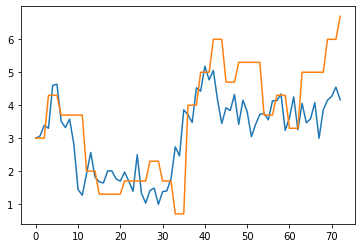

In [20]:
plt.show()
plt.plot(modele1.predict(K1))
plt.plot(Kp1)

In [23]:
er=[]

In [24]:
er=np.append(er,npl.norm(Kp1-modele1.predict(K1),2)/sqrt(73))

print(er)

[1.15680748]


In [25]:
ticks2 = spt.tickrange('2003-01-01T00:00:00', '2003-01-04T00:00:00', deltadays = 1./24.)
d2 = om.get_omni(ticks2)
ticks3 = spt.tickrange('2003-01-04T00:00:00', '2003-05-01T00:00:00', deltadays = 1./24.)
d3 = om.get_omni(ticks3)

In [26]:
Bz2=d2['BzIMF']
n2=d2['dens']
Kp2=d2['Kp']
K2=np.zeros((73,3))
for i in range (np.size(d2['velo'])):
    K2[i,0]=d2['velo'][i]
    K2[i,1]=d2['BzIMF'][i]
    K2[i,2]=d2['dens'][i]

In [27]:
Bz3=d3['BzIMF']
n3=d3['dens']
Kp3=d3['Kp']
K3=np.zeros((np.size(d3['velo']),3))
for i in range (np.size(d3['velo'])):
    K3[i,0]=d3['velo'][i]
    K3[i,1]=d3['BzIMF'][i]
    K3[i,2]=d3['dens'][i]

In [28]:
modele2 = knn.fit(K3, Kp3)

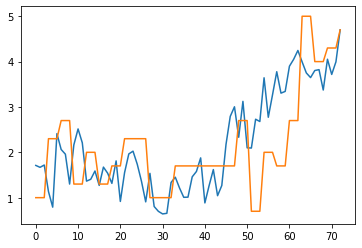

In [29]:
plt.show()
plt.plot(modele2.predict(K2))
plt.plot(Kp2)

In [30]:
er=np.append(er,npl.norm(Kp2-modele2.predict(K2),2)/sqrt(73))
print(er)

[1.15680748 0.90472488]


In [31]:
ticks4 = spt.tickrange('2003-01-04T00:00:00', '2003-01-07T00:00:00', deltadays = 1./24.)
d4 = om.get_omni(ticks4)
ticks5 = spt.tickrange('2003-01-01T00:00:00', '2003-01-04T00:00:00', deltadays = 1./24.)
ticks6 = spt.tickrange('2003-01-07T00:00:00', '2003-05-01T00:00:00', deltadays = 1./24.)
d5 = om.get_omni(ticks5)
d6 = om.get_omni(ticks6)

In [32]:
Bz4=d4['BzIMF']
n4=d4['dens']
Kp4=d4['Kp']
K4=np.zeros((73,3))
for i in range (np.size(d4['velo'])):
    K4[i,0]=d4['velo'][i]
    K4[i,1]=d4['BzIMF'][i]
    K4[i,2]=d4['dens'][i]
print(np.size(d4['Kp']))
print(np.size(d5['Kp'])+np.size(d6['Kp']))

73
2810


In [33]:
Bz5=d5['BzIMF']
n5=d5['dens']
Kp5=d5['Kp']
K5=np.zeros((np.size(d5['Kp'])+np.size(d6['Kp']),3))
for i in range (np.size(d5['velo'])):
    K5[i,0]=d5['velo'][i]
    K5[i,1]=d5['BzIMF'][i]
    K5[i,2]=d5['dens'][i]

In [34]:
for i in range (np.size(d6['velo'])):
    K5[i+73,0]=d6['velo'][i]
    K5[i+73,1]=d6['BzIMF'][i]
    K5[i+73,2]=d6['dens'][i]

In [35]:
Kpp=(np.append(d5['Kp'],d6['Kp']))

In [36]:
modele3=knn.fit(K5,Kpp)

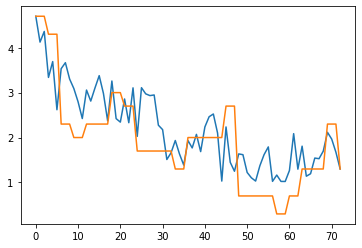

In [37]:
plt.show()
plt.plot(modele3.predict(K4))
plt.plot(Kp4)

In [39]:
print(npl.norm(Kp4-modele3.predict(K4),2)/sqrt(73))
er=np.append(er,npl.norm(Kp4-modele3.predict(K4),2)/sqrt(73))
er

0.7312164959970867


array([1.15680748, 0.90472488, 0.7312165 ])

In [87]:
#On a changé les données de ticks4, ticks5, ticks6 ci-dessous plusieurs fois et compilé à chaque fois pour obtenir des erreurs.
#Parce qu'on ne sais pas comment utiliser la boucle pour ces données-là

ticks4 = spt.tickrange('2003-01-07T00:00:00', '2003-01-10T00:00:00', deltadays = 1./24.)
d4 = om.get_omni(ticks4)
ticks5 = spt.tickrange('2003-01-01T00:00:00', '2003-01-07T00:00:00', deltadays = 1./24.)
ticks6 = spt.tickrange('2003-01-10T00:00:00', '2003-05-01T00:00:00', deltadays = 1./24.)
d5 = om.get_omni(ticks5)
d6 = om.get_omni(ticks6)
Kp4=d4['Kp']
n1=np.size(Kp4)
K4=np.zeros((n1,3))
for i in range (np.size(d4['velo'])):
    K4[i,0]=d4['velo'][i]
    K4[i,1]=d4['BzIMF'][i]
    K4[i,2]=d4['dens'][i]
n=np.size(d5['Kp'])+np.size(d6['Kp'])
K5=np.zeros((n,3))
for i in range (np.size(d5['velo'])):
    K5[i,0]=d5['velo'][i]
    K5[i,1]=d5['BzIMF'][i]
    K5[i,2]=d5['dens'][i]
for i in range (np.size(d6['velo'])):
    K5[i+73,0]=d6['velo'][i]
    K5[i+73,1]=d6['BzIMF'][i]
    K5[i+73,2]=d6['dens'][i]
Kpp=(np.append(d5['Kp'],d6['Kp']))
modele3=knn.fit(K5,Kpp)
print(n)
print(n1)
print(npl.norm(Kp4-modele3.predict(K4),2)/sqrt(73))
#er=np.append(er,npl.norm(Kp4-modele3.predict(K4),2)/sqrt(n1))
er

2810
73
2.1109905921770054


array([1.15680748, 0.90472488, 0.7312165 , 2.11099059, 1.46226506,
       1.79475506, 1.02981042, 0.79109133, 1.19120017, 1.59846634,
       1.20018419, 1.74326646, 1.36774054, 0.65087356, 0.98605965,
       1.25056527, 1.11397236, 1.14186109, 0.90487293, 1.22073731,
       1.39010092, 1.50988806, 1.17746436, 0.88131971, 1.18602083,
       1.76577551, 1.8799173 , 1.19147346, 1.43615923, 1.17858981,
       1.71700046, 0.86229832, 1.03793159, 1.23177395, 0.90638152,
       0.97520168, 1.00392836, 0.9531413 , 0.92084067, 0.88665201])

#### l'erreur de 1/1/2003-1/5/2003


array([0.90472488, 0.7312165 , 2.11099059, 1.46226506, 1.79475506,
       1.02981042, 0.79109133, 1.19120017, 1.59846634, 1.20018419,
       1.74326646, 1.36774054, 0.65087356, 0.98605965, 1.25056527,
       1.11397236, 1.14186109, 0.90487293, 1.22073731, 1.39010092,
       1.50988806, 1.17746436, 0.88131971, 1.18602083, 1.76577551,
       1.8799173 , 1.19147346, 1.43615923, 1.17858981, 1.71700046,
       0.86229832, 1.03793159, 1.23177395, 0.90638152, 0.97520168,
       1.00392836, 0.9531413 , 0.92084067, 0.88665201, 1.15680748])

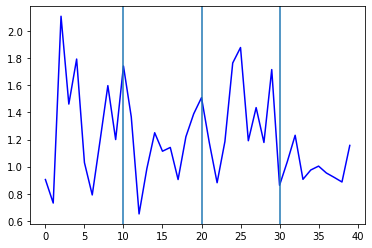

In [85]:
er1=np.append(er[1:],er[0])
plt.show()
plt.plot(er1,'b')
plt.axvline(x=10)
plt.axvline(x=20)
plt.axvline(x=30)
er1

#### l'erreur de 1/1/2002-1/5/2002

array([0.6307011 , 0.62112777, 1.27668867, 1.61901605, 0.74228735,
       1.08097839, 1.08408683, 0.9760966 , 1.06227484, 1.02928668,
       1.38022585, 1.52648483, 1.92323548, 1.1033256 , 1.3210302 ,
       1.2998581 , 0.74260717, 1.0093147 , 0.98166193, 1.82999039,
       1.32527289, 1.98961708, 1.01016519, 0.91497457, 0.96970064,
       1.1502763 , 0.95275984, 1.62213747, 1.04305665, 1.50074611,
       0.91160247, 0.73856723, 0.78672394, 1.07020422, 1.13784299,
       2.53700277, 2.23219374, 1.21463394, 1.0596552 , 0.86529963])

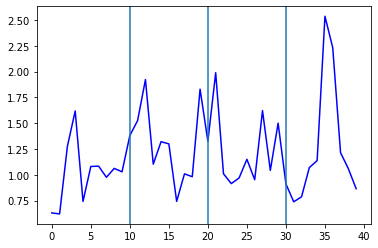

In [334]:
er1=np.append(er[1:],er[0])
plt.show()
plt.plot(er1,'b')
plt.axvline(x=10)
plt.axvline(x=20)
plt.axvline(x=30)
er1

#### Comparaison entre les 2 durées 1/1/2002-1/5/2002 et 1/1/2003-1/5/2003

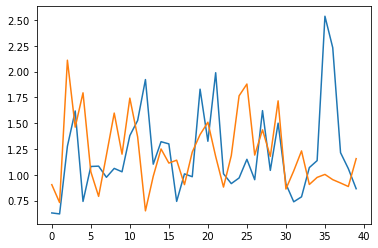

In [89]:
er2=np.array([0.90472488, 0.7312165 , 2.11099059, 1.46226506, 1.79475506,
       1.02981042, 0.79109133, 1.19120017, 1.59846634, 1.20018419,
       1.74326646, 1.36774054, 0.65087356, 0.98605965, 1.25056527,
       1.11397236, 1.14186109, 0.90487293, 1.22073731, 1.39010092,
       1.50988806, 1.17746436, 0.88131971, 1.18602083, 1.76577551,
       1.8799173 , 1.19147346, 1.43615923, 1.17858981, 1.71700046,
       0.86229832, 1.03793159, 1.23177395, 0.90638152, 0.97520168,
       1.00392836, 0.9531413 , 0.92084067, 0.88665201, 1.15680748])
er1=np.array([0.6307011 , 0.62112777, 1.27668867, 1.61901605, 0.74228735,
       1.08097839, 1.08408683, 0.9760966 , 1.06227484, 1.02928668,
       1.38022585, 1.52648483, 1.92323548, 1.1033256 , 1.3210302 ,
       1.2998581 , 0.74260717, 1.0093147 , 0.98166193, 1.82999039,
       1.32527289, 1.98961708, 1.01016519, 0.91497457, 0.96970064,
       1.1502763 , 0.95275984, 1.62213747, 1.04305665, 1.50074611,
       0.91160247, 0.73856723, 0.78672394, 1.07020422, 1.13784299,
       2.53700277, 2.23219374, 1.21463394, 1.0596552 , 0.86529963])
plt.show()
plt.plot(er1)
plt.plot(er2)

##### Consideration l'homogénéité de la durée 1/1/2002-4/5/2002

array([0.6307011 , 0.62112777, 1.27668867, 1.61901605, 0.74228735,
       1.08097839, 1.08408683, 0.9760966 , 1.06227484, 1.02928668,
       1.38022585, 1.52648483, 1.92323548, 1.1033256 , 1.3210302 ,
       1.2998581 , 0.74260717, 1.0093147 , 0.98166193, 1.82999039,
       1.32527289, 1.98961708, 1.01016519, 0.91497457, 0.96970064,
       1.1502763 , 0.95275984, 1.62213747, 1.04305665, 1.50074611,
       0.91160247, 0.73856723, 0.78672394, 1.07020422, 1.13784299,
       2.53700277, 2.23219374, 1.21463394, 1.0596552 , 0.86529963,
       0.63199574])

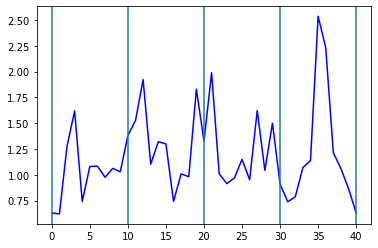

In [340]:
ticks = spt.tickrange('2002-01-01T00:00:00', '2002-05-01T00:00:00', deltadays = 1./24.)
d = om.get_omni(ticks)
Bz=d['BzIMF']
n=d['dens']
Kp=d['Kp']
K=np.zeros((np.size(d['velo']),3))
for i in range (np.size(d['velo'])):
    K[i,0]=d['velo'][i]
    K[i,1]=d['BzIMF'][i]
    K[i,2]=d['dens'][i]
ticks1 = spt.tickrange('2002-05-01T00:00:00', '2002-05-04T00:00:00', deltadays = 1./24.)
d1 = om.get_omni(ticks1)
Bz1=d1['BzIMF']
n1=d1['dens']
Kp1=d1['Kp']
K1=np.zeros((73,3))
for i in range (np.size(d1['velo'])):
    K1[i,0]=d1['velo'][i]
    K1[i,1]=d1['BzIMF'][i]
    K1[i,2]=d1['dens'][i]
modele1 = knn.fit(K, Kp)
#er1=np.append(er1,npl.norm(Kp1-modele1.predict(K1),2)/sqrt(73))
plt.show()
plt.plot(er1,'b')
plt.axvline(x=10)
plt.axvline(x=20)
plt.axvline(x=30)
plt.axvline(x=40)
plt.axvline(x=0)
er1

Les erreurs par mois semble peut-être suivre une telle forme bien que l'amplitude oscille entre 0,6 et 2,5
Alors, on peut appliquer le modèle selon velocity, density, BzIMF pour anticiper les valeurs Kp.

## Comparaison entre 2 méthode Nearest-Neighbor et Support-Vector-Machine 

In [342]:

from sklearn import svm

In [343]:
set_ticks=[ [spt.tickrange('2002-01-01T00:00:00', '2002-02-01T00:00:00', deltadays = 1./24.),
             spt.tickrange('2002-02-02T00:00:00', '2002-02-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-02-01T00:00:00', '2002-03-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-03-02T00:00:00', '2002-03-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-03-01T00:00:00', '2002-04-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-04-02T00:00:00', '2002-04-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-04-01T00:00:00', '2002-05-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-05-02T00:00:00', '2002-05-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-05-01T00:00:00', '2002-06-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-06-02T00:00:00', '2002-06-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-06-01T00:00:00', '2002-07-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-07-02T00:00:00', '2002-07-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-07-01T00:00:00', '2002-08-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-08-02T00:00:00', '2002-08-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-08-01T00:00:00', '2002-09-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-09-02T00:00:00', '2002-09-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-09-01T00:00:00', '2002-10-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-10-02T00:00:00', '2002-10-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-10-01T00:00:00', '2002-11-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2002-11-02T00:00:00', '2002-11-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2002-11-01T00:00:00', '2002-12-01T00:00:00', deltadays = 1./24.),
        spt.tickrange('2002-12-02T00:00:00', '2002-12-05T00:00:00', deltadays = 1./24.)],
        
        [spt.tickrange('2003-01-01T00:00:00', '2003-02-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2003-02-02T00:00:00', '2003-02-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2003-02-01T00:00:00', '2003-03-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2003-03-02T00:00:00', '2003-03-05T00:00:00', deltadays = 1./24.)],
           
           
        [spt.tickrange('2003-03-01T00:00:00', '2003-04-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2003-04-02T00:00:00', '2003-04-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2003-04-01T00:00:00', '2003-05-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2003-05-02T00:00:00', '2003-05-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2003-05-01T00:00:00', '2003-06-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2003-06-02T00:00:00', '2003-06-05T00:00:00', deltadays = 1./24.)],
           
        [spt.tickrange('2004-06-01T00:00:00', '2004-07-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-07-02T00:00:00', '2004-07-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2004-07-01T00:00:00', '2004-08-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-08-02T00:00:00', '2004-08-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2004-08-01T00:00:00', '2004-09-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-09-02T00:00:00', '2004-09-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2004-05-01T00:00:00', '2004-06-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-06-02T00:00:00', '2004-06-05T00:00:00', deltadays = 1./24.)],
           
        [spt.tickrange('2004-06-01T00:00:00', '2004-07-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-07-02T00:00:00', '2004-07-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2004-07-01T00:00:00', '2004-08-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-08-02T00:00:00', '2004-08-05T00:00:00', deltadays = 1./24.)],
        [spt.tickrange('2004-08-01T00:00:00', '2004-09-01T00:00:00', deltadays = 1./24.),
         spt.tickrange('2004-09-02T00:00:00', '2004-09-05T00:00:00', deltadays = 1./24.)]
      ]
clf = svm.SVR()

In [344]:
err=[]
for tick in (set_ticks):
    ticks=tick[0]
    ticks1=tick[1]
    
    d = om.get_omni(ticks)
    d1 = om.get_omni(ticks1)

    Kp=d['Kp']
    n=np.size(d['Kp'])
    
    K=np.zeros((n,3))
    for i in range (np.size(d['velo'])):
        K[i,0]=d['velo'][i]
        K[i,1]=d['BzIMF'][i]
        K[i,2]=d['dens'][i]

    Kp1=d1['Kp']
    n1=np.size(d1['Kp'])
    
    K1=np.zeros((n1,3))
    for i in range (np.size(d1['velo'])):
        K1[i,0]=d1['velo'][i]
        K1[i,1]=d1['BzIMF'][i]
        K1[i,2]=d1['dens'][i]
    models=knn.fit(K,Kp)
    y=knn.predict(K1)
    err=np.append(err,npl.norm(Kp1-y,2)/np.sqrt(n1))
print(err)

[1.03678049 0.79379536 0.82813399 0.68320459 0.99890083 0.75845125
 1.41849834 1.34187704 1.90615856 1.09590257 0.80304336 1.65485071
 1.29915897 0.75861773 1.30814855 0.93126306 0.45431492 0.59461901
 0.70903546 0.66358124 0.45431492 0.59461901 0.70903546]


In [345]:
err1=[]
for tick in (set_ticks):
    ticks=tick[0]
    ticks1=tick[1]
    
    d = om.get_omni(ticks)
    d1 = om.get_omni(ticks1)

    Kp=d['Kp']
    n=np.size(d['Kp'])
    
    K=np.zeros((n,3))
    for i in range (np.size(d['velo'])):
        K[i,0]=d['velo'][i]
        K[i,1]=d['BzIMF'][i]
        K[i,2]=d['dens'][i]

    Kp1=d1['Kp']
    n1=np.size(d1['Kp'])
    
    K1=np.zeros((n1,3))
    for i in range (np.size(d1['velo'])):
        K1[i,0]=d1['velo'][i]
        K1[i,1]=d1['BzIMF'][i]
        K1[i,2]=d1['dens'][i]
    models=clf.fit(K,Kp)
    y=clf.predict(K1)
    err1=np.append(err1,npl.norm(Kp1-y,2)/np.sqrt(n1))

print(err1)

C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\alexa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

[1.1821126  0.74215916 0.98298997 0.9376982  0.96945357 0.89503402
 1.70563326 1.64209096 2.97564586 1.08446478 0.72050131 2.01214984
 1.28320873 0.7856729  1.40913433 1.07221457 0.49471382 1.29731102
 0.91353185 0.62362467 0.49471382 1.29731102 0.91353185]


Text(0.5, 1.0, 'Comparaison "nearest neighbor" et "support vector"')

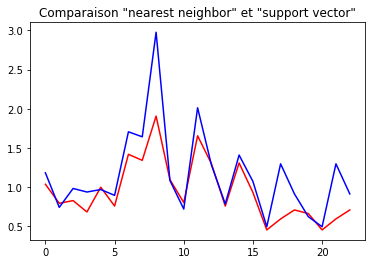

In [355]:
plt.show()
plt.plot(err,'r',label='nearest neighbor')
plt.plot(err1,'b',label='support vector machine')
plt.title(label = 'Comparaison "nearest neighbor" et "support vector"')

Ici, les erreurs par la méthode "nearest neighbor" sont les points liés par la ligne rouge et celles par la méthode "support vector" sont les points liés par la ligne bleu. On peut constater que la méthode "nearest neighbor" est mieux que la méthode "support vector"